<a href="https://colab.research.google.com/github/asim5800/Bank-Marketing-Effectiveness-Prediction-/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [130]:
#Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import  RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import  precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import KFold
from sklearn.utils import resample


In [131]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pylab as pylab
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [133]:

df= pd.read_csv('/content/drive/MyDrive/Bank Marketing Effectiveness Prediction- Asim Siddiqui/Bank-full.csv', sep = ';')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [135]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [136]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [137]:
#renaming column
df.rename(columns = {'y' : 'Subscribed'}, inplace = True)


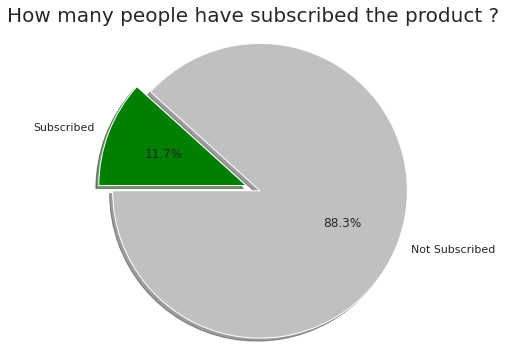

In [138]:
#EDA


labels = 'Not Subscribed' , 'Subscribed'
sizes = df.Subscribed.value_counts()
colors = ['silver', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("How many people have subscribed the product ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


In [139]:
df['Subscribed'].value_counts()

no     39922
yes     5289
Name: Subscribed, dtype: int64

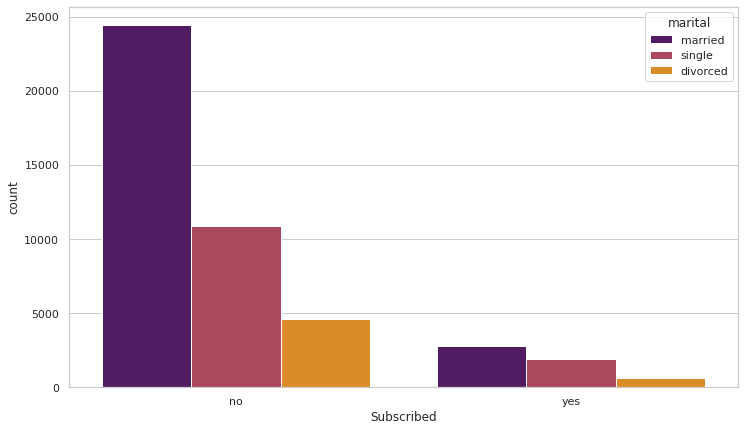

In [140]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
store_type=sns.countplot(x='Subscribed',hue='marital', data=df, palette="inferno")



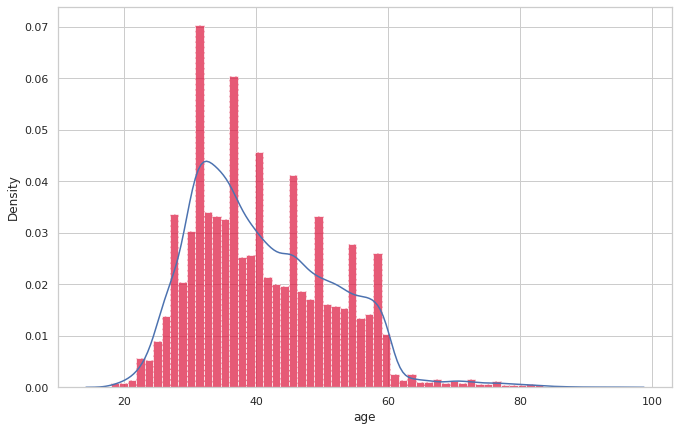

In [141]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(df["age"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7}, bins=60); # hist keyword parameter to change hist format


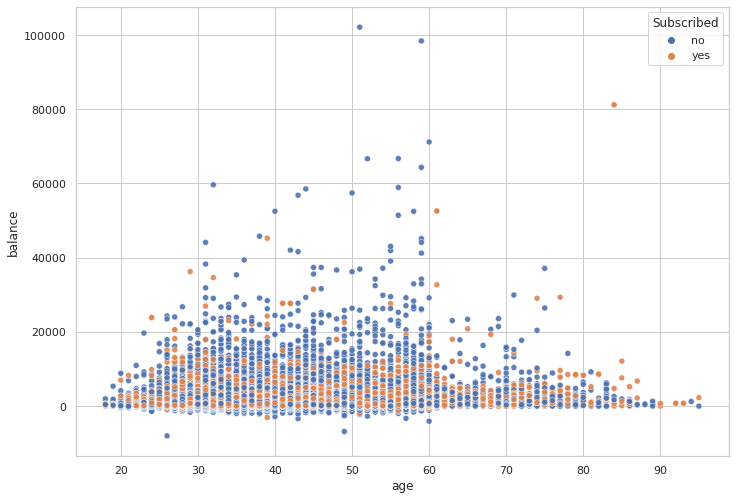

In [142]:
sns.scatterplot(x="age", y="balance",hue='Subscribed',data=df,x_bins=50,y_bins=50,alpha=0.9);

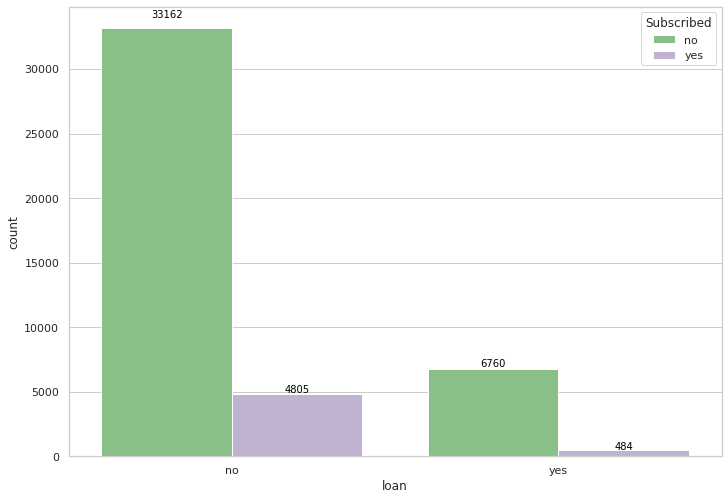

In [143]:
g=sns.countplot(x="loan", hue="Subscribed", data=df,palette= 'Accent');


for p in g.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    g.annotate(f'{height}', (x + width/2, y + height*1.025), ha='center',color='black', size=10)



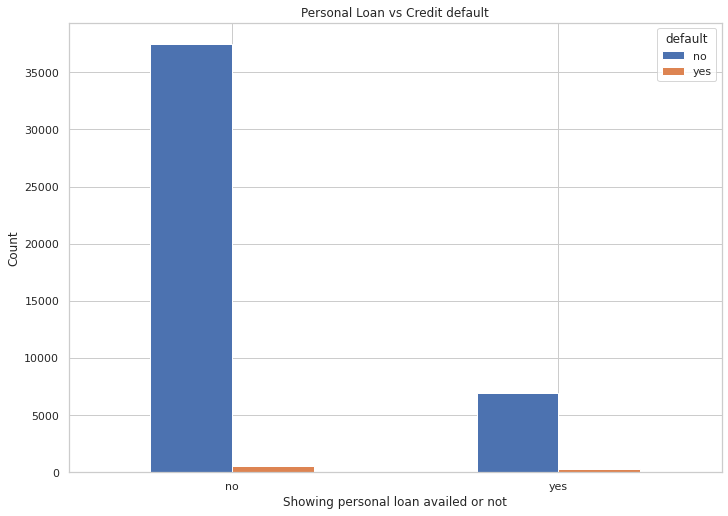

In [144]:
pd.crosstab(df.loan,df.default).plot(kind='bar');
plt.title("Personal Loan vs Credit default")
plt.xlabel('Showing personal loan availed or not')
plt.ylabel('Count');
plt.xticks(rotation=0);


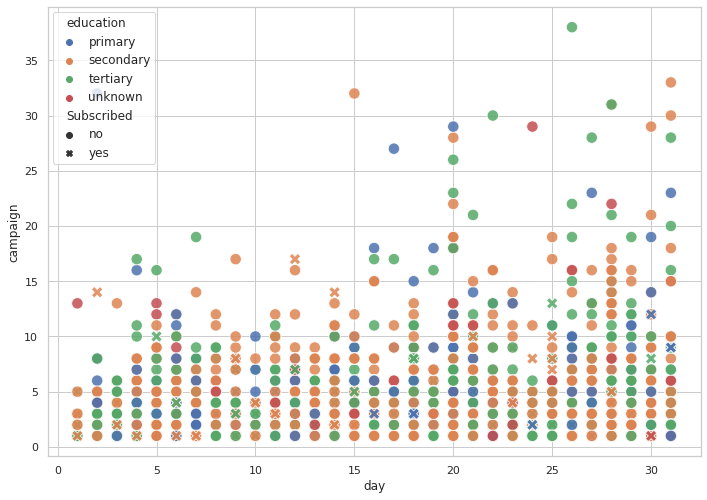

In [145]:
sample_loan=df.sample(6000)
sns.scatterplot(x="day", y="campaign", hue="education", data=sample_loan,x_bins=50,y_bins=50,alpha=0.85, style="Subscribed",s=130 );

In [146]:
#removing unknown occupation
df1 = df[df.job != 'unknown']

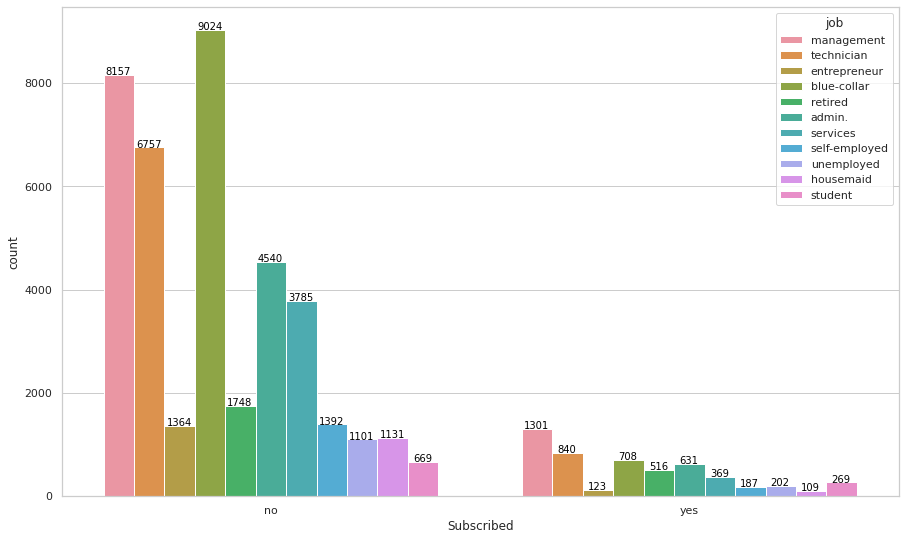

In [147]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
job_sub=sns.countplot(x='Subscribed',hue='job', data=df1)

for p in job_sub.patches:
    job_sub.annotate(f'\n{p.get_height()}', (p.get_x()+0.035, p.get_height()),ha='center', va='baseline', color='black', size=10)


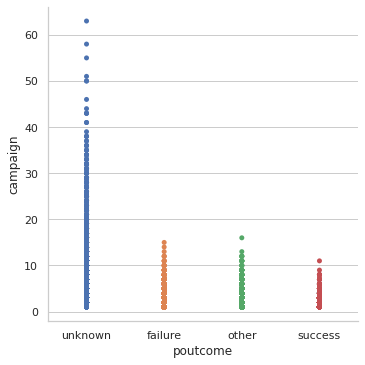

In [148]:
sns.catplot(x="poutcome", y="campaign",jitter=False, data=df1);


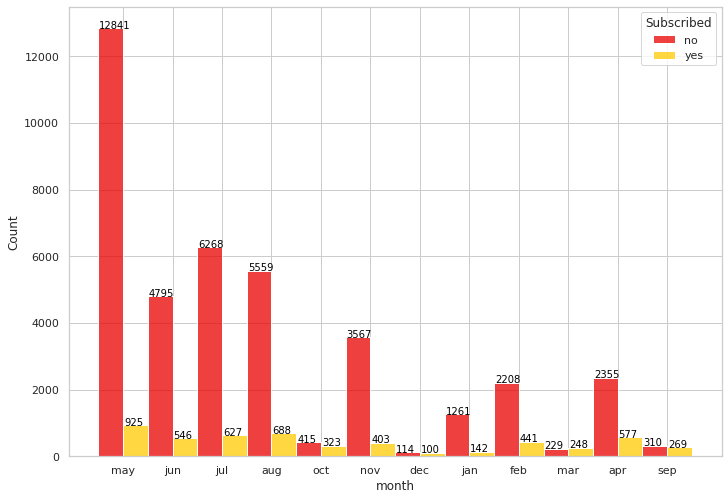

In [149]:
sns.set_style("whitegrid")
mon_sub=sns.histplot(binwidth=0.4, x="month", hue="Subscribed", data=df, stat="count", multiple="dodge" ,palette='hot',bins=40);


for p in mon_sub.patches:
    mon_sub.annotate(f'\n{p.get_height()}', (p.get_x()+0.02, p.get_height()+0.03),color='black', size=10)

In [150]:
df2=df.copy()
#from scipy import stats
#df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)]

In [151]:
#converting categorical feature into numeric
for label, content in df2.items():
    if not pd.api.types.is_numeric_dtype(content):
      df2[label]=pd.Categorical(content).codes #turning categories into numbers


In [152]:
df2.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0
45210,37,2,1,1,0,2971,0,0,0,17,9,361,2,188,11,1,0


In [153]:
df_temp=df2.copy()
df_temp.drop('contact', axis=1,inplace=True)

In [154]:
# converting all columns to int64
cols = ['job', 'marital','education','default', 'housing', 'loan', 'month', 'poutcome','Subscribed']
df_temp[cols] = df_temp[cols].applymap(np.int64)


In [155]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         45211 non-null  int64
 1   job         45211 non-null  int64
 2   marital     45211 non-null  int64
 3   education   45211 non-null  int64
 4   default     45211 non-null  int64
 5   balance     45211 non-null  int64
 6   housing     45211 non-null  int64
 7   loan        45211 non-null  int64
 8   day         45211 non-null  int64
 9   month       45211 non-null  int64
 10  duration    45211 non-null  int64
 11  campaign    45211 non-null  int64
 12  pdays       45211 non-null  int64
 13  previous    45211 non-null  int64
 14  poutcome    45211 non-null  int64
 15  Subscribed  45211 non-null  int64
dtypes: int64(16)
memory usage: 5.5 MB


In [156]:
df_temp.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [157]:
df_working=df_temp.copy()

In [158]:
df_working = df_working.drop(df[(df_working.balance < 100)|(df_working.balance > 40000)|(df_working.duration < 5)].index)#removing those people having balance<100 and call <5

In [159]:
df_working.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
count,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000,32730.000000
mean,41.254751,4.365995,1.182921,1.241858,0.003300,1861.232844,0.549343,0.137764,15.682310,5.500642,263.931378,2.692209,43.323526,0.647510,2.520501,0.133547
std,10.833269,3.259616,0.600901,0.753564,0.057349,2963.402180,0.497567,0.344657,8.267834,3.077102,263.162558,2.932940,102.355735,2.525342,1.019543,0.340170
min,18.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,362.000000,0.000000,0.000000,8.000000,3.000000,105.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,833.000000,1.000000,0.000000,16.000000,6.000000,184.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,2081.750000,1.000000,0.000000,21.000000,8.000000,326.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,39385.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [160]:
df_working['Subscribed'].value_counts()

0    28359
1     4371
Name: Subscribed, dtype: int64

In [161]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32730 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         32730 non-null  int64
 1   job         32730 non-null  int64
 2   marital     32730 non-null  int64
 3   education   32730 non-null  int64
 4   default     32730 non-null  int64
 5   balance     32730 non-null  int64
 6   housing     32730 non-null  int64
 7   loan        32730 non-null  int64
 8   day         32730 non-null  int64
 9   month       32730 non-null  int64
 10  duration    32730 non-null  int64
 11  campaign    32730 non-null  int64
 12  pdays       32730 non-null  int64
 13  previous    32730 non-null  int64
 14  poutcome    32730 non-null  int64
 15  Subscribed  32730 non-null  int64
dtypes: int64(16)
memory usage: 4.2 MB


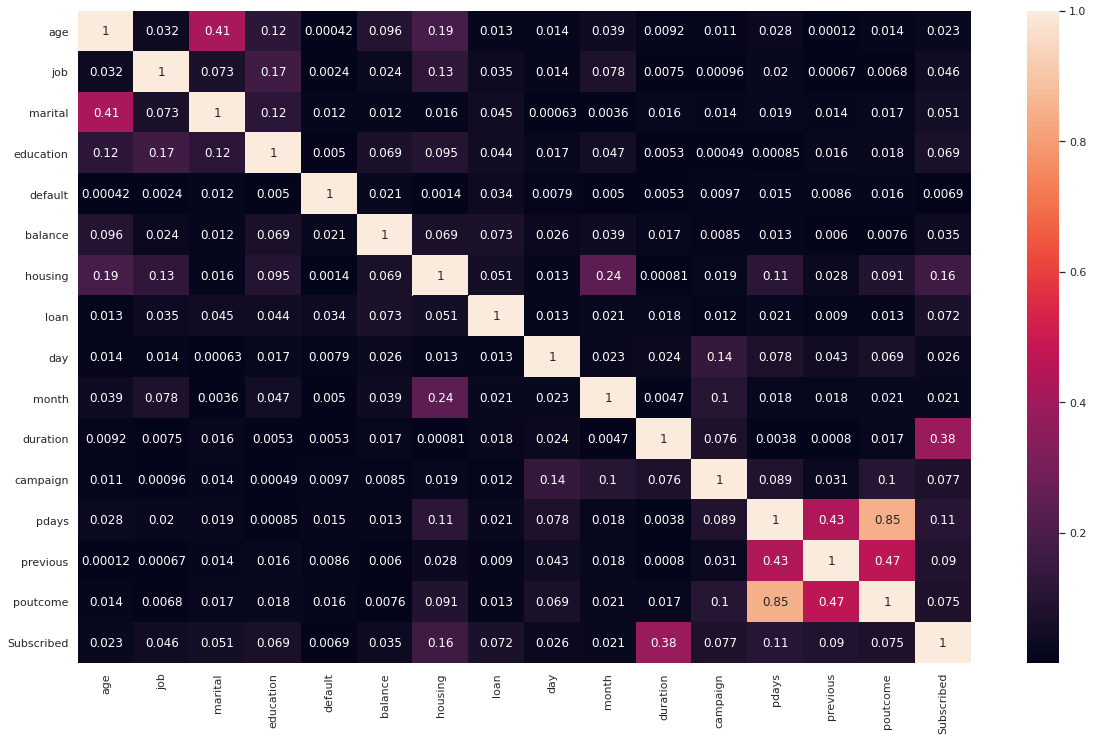

In [162]:
plt.subplots(figsize=(20,12))

sns.heatmap(df_working.corr().abs(), annot=True);

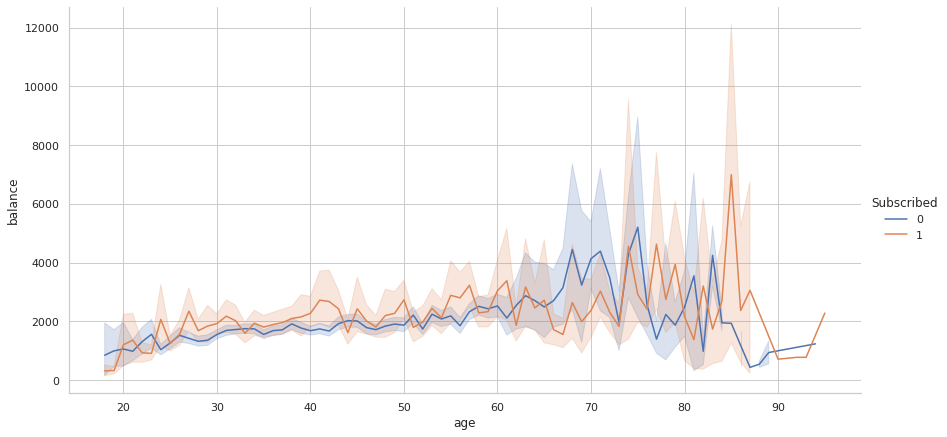

In [163]:
sns.relplot(x="age", y="balance", kind="line", data=df_working, hue='Subscribed',height=6,aspect=2 );

In [164]:
##modeling
df_working.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,5,8,217,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,5,8,50,1,-1,0,3,0


In [165]:
#splitting data into x and y
X=df_working.drop('Subscribed',axis=1)
y= df_working['Subscribed']

In [207]:
#separating training and testing data by keeping ratio of 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [210]:
X_train.head(2)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
17136,26,1,1,0,0,133,0,1,25,5,57,3,-1,0,3
44634,77,5,1,0,0,1492,0,0,1,11,663,1,208,2,1


In [168]:
#shape of our Training and Testing data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22911, 15), (22911,), (9819, 15), (9819,))

In [169]:
#put models in a dictionary

models= {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier(),
         'XGboost': XGBClassifier() }


#create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates ML models
  models: a dictionary of Scikit Learn Classifier models
  X_train, y_train: training data
  X_test, y_test: testing data
  """

  #set random seed
  np.random.seed(101)  

  #make a dictionary to keep model score
  model_scores={}

  #loop through models
  for name,model in models.items():
    #fit the model to the data
    model.fit(X_train, y_train)
    #evaluate the model and append its score to model score
    model_scores[name]=model.score(X_test, y_test)
  return model_scores  




In [170]:
#only BASELINE MODEL
model_scores =fit_and_score(models=models, 
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.8647520114064569,
 'Logistic Regression': 0.8684183725430288,
 'Random Forest': 0.88613911803646,
 'XGboost': 0.8859354313066504}

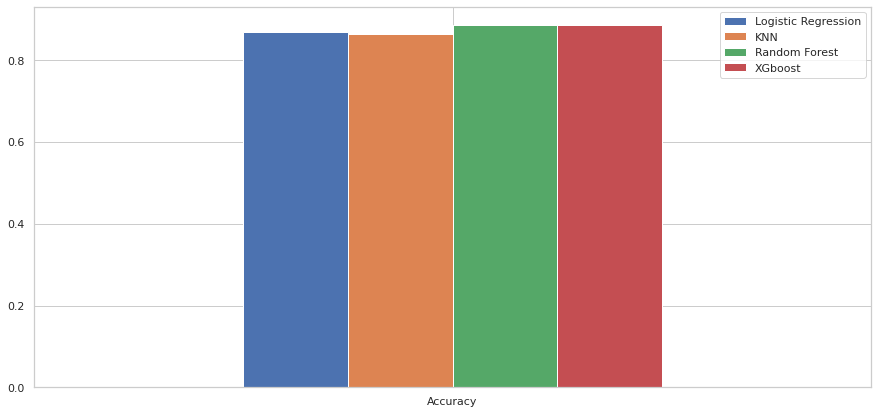

In [171]:
##model comparison
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])# as default score matrix is accuracy

model_compare.plot.bar(rot=0,figsize=(15, 7));

In [172]:
#now we have our baseline model now we try to improve these
#hyperparameter tuning of knn
train_scores = []
test_scores = []

#create a list of different values of N NEIGHBOURS
neighbors= range(1,21)

#setup KNN instance
#20 different knn models
knn = KNeighborsClassifier()

#loop through different n neighbours
for i in neighbors:
  knn.set_params(n_neighbors= i)
  
  #fit algo
  knn.fit(X_train,y_train)

  #update training score list
  train_scores.append(knn.score(X_train,y_train))

  #update the test score list
  test_scores.append(knn.score(X_test,y_test))


In [173]:
test_scores.index(max(test_scores))

17

Maximum KNN score on the test data:86.85% on k value as 17


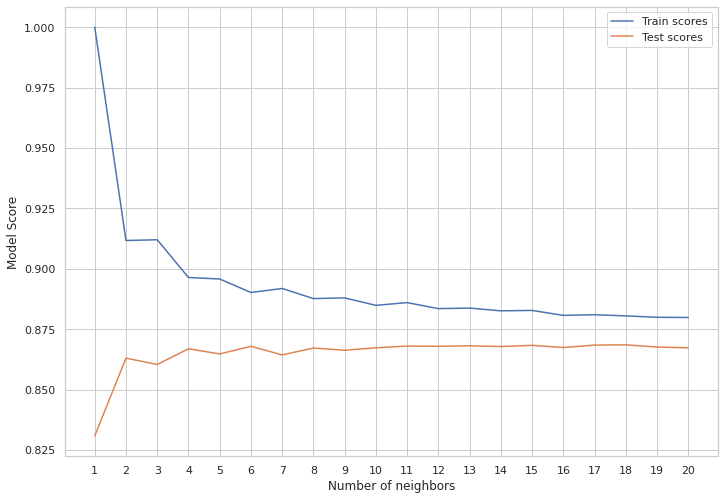

In [174]:
plt.plot(neighbors,train_scores,label='Train scores' )
plt.plot(neighbors,test_scores,label='Test scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}% on k value as 17")

In [175]:
#Hyperparameter tuning with randomize search cv
#creating hyperparameter grid for Logistic regression


log_reg_grid={'C': np.logspace(-4,4,20),
              'solver':['liblinear']}


#create hyperparameter grid for Random forest

rf_grid= {'n_estimators' : np.arange(10,1000,50),
          'max_depth' : [None, 3,5,10],
          'min_samples_split' : np.arange(2,20,2),
          'min_samples_leaf' : np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          }

In [176]:
#tune logistic regression
np.random.seed(42)
#setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)


# fit random hyperparameter search for logistic regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   31.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [177]:
rs_log_reg.best_params_

{'C': 3792.690190732246, 'solver': 'liblinear'}

In [178]:
rs_log_reg.score(X_test,y_test)

0.8723902637743151

In [179]:
# doing for random forest 
np.random.seed(42)
setup random hyperparameter search for logistic regression
rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

fit random hyperparamter search model for RandomForestClassifier()

rs_rf.fit(X_train,y_train)

IndentationError: ignored

In [ ]:
#best hyperparameters
rs_rf.best_params_

In [ ]:
#evaluate the randomiZed searcgF Random Forest classifier model

rs_rf.score(X_test,y_test)

In [180]:
# tune using grid search cv for logistic regression

log_reg_grid={'C': np.logspace(-4,4,20),
              'solver':['liblinear']}

#setup grid hyperparameter search for Logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid hyperparameter search model

gs_log_reg.fit(X_train,y_train);



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   30.1s finished


In [181]:
gs_log_reg.best_params_

{'C': 3792.690190732246, 'solver': 'liblinear'}

In [182]:
gs_log_reg.score(X_test,y_test)

0.8723902637743151

only random search forest is working at 89%

In [183]:
#evaluating our tuned rondom forest
# make prediction with tuned model

y_preds= rs_rf.predict(X_test)

In [184]:
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [185]:
y_test

9088     0
33423    0
37526    0
30858    0
24098    1
        ..
7340     0
16727    0
15264    0
37728    0
41272    0
Name: Subscribed, Length: 9819, dtype: int64

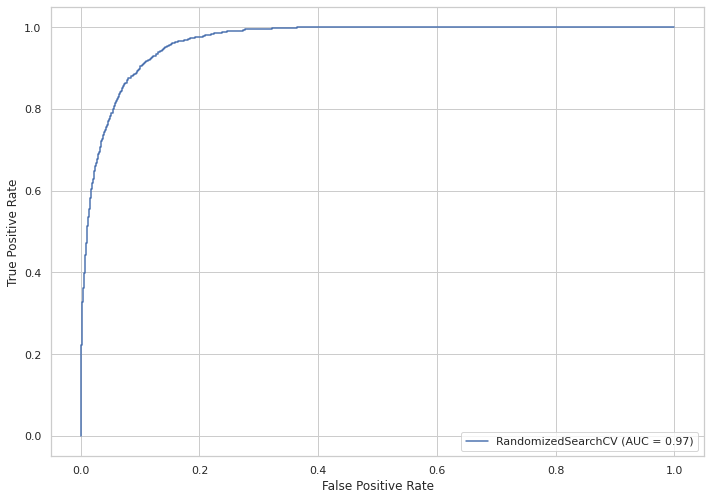

In [186]:
#roc curve true+ rate against false+ rate
plot_roc_curve(rs_rf, X_test,y_test); 

In [187]:
#confusion matrix
cf_matrix=confusion_matrix(y_test,y_preds)
print(cf_matrix)

[[7857  648]
 [ 180 1134]]


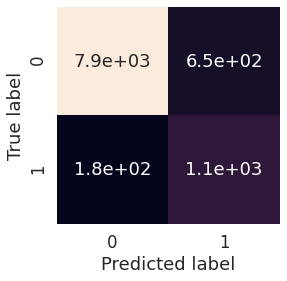

In [188]:



#visualising
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
  """
  plot for confusion matrix using heatmap 

  """
  fig,ax= plt.subplots(figsize=(4,4))
  ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                 annot=True,              
                 cbar=False)
  plt.xlabel("Predicted label")
  plt.ylabel("True label")
  
plot_conf_mat(y_test,y_preds)  

#750 such that he has subscribed but model showing he has not subscribed in this case  this is acceptable for company genreating revenue but 
#for situtation like false positive its dangerous as false postive means customer has subscribed according to model even though he didnt.

In [189]:
#classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8505
           1       0.64      0.86      0.73      1314

    accuracy                           0.92      9819
   macro avg       0.81      0.89      0.84      9819
weighted avg       0.93      0.92      0.92      9819



#fixing our unbalanced data set 

In [190]:
df_majority = df_working[df_working['Subscribed'] == 0]

In [191]:
df_minority = df_working[df_working['Subscribed'] == 1]

In [192]:
df_minority.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
count,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.0
mean,41.885610,4.748570,1.261267,1.373827,0.002288,2121.980096,0.340654,0.074582,15.138641,5.336994,521.037520,2.113475,70.923358,1.224205,2.326470,1.0
std,13.757551,3.156798,0.636357,0.748938,0.047782,3083.322303,0.473983,0.262747,8.477943,3.447767,386.596684,1.908773,119.679952,2.641175,1.026104,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,1.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000,1.0
25%,31.000000,2.000000,1.000000,1.000000,0.000000,429.000000,0.000000,0.000000,8.000000,2.000000,236.000000,1.000000,-1.000000,0.000000,2.000000,1.0
50%,38.000000,4.000000,1.000000,1.000000,0.000000,1058.000000,0.000000,0.000000,15.000000,6.000000,406.000000,2.000000,-1.000000,0.000000,3.000000,1.0
75%,51.000000,8.000000,2.000000,2.000000,0.000000,2600.000000,1.000000,0.000000,22.000000,8.000000,705.000000,2.000000,101.000000,2.000000,3.000000,1.0
max,95.000000,11.000000,2.000000,3.000000,1.000000,36252.000000,1.000000,1.000000,31.000000,11.000000,3881.000000,32.000000,854.000000,58.000000,3.000000,1.0


In [193]:
#IMBALANCED DATASET FIX
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= int(4640*3),    
                                 random_state=123
                                 ) 

In [194]:
#IMBALANCED DATASET FIX
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [195]:
y_new = df_upsampled['Subscribed']

In [196]:
df_upsampled["Subscribed"].value_counts() 

0    28359
1    13920
Name: Subscribed, dtype: int64

In [197]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop('Subscribed', axis = 1), y_new, test_size = 0.1942313295, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [198]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [199]:

rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

In [200]:


models = pd.DataFrame({
                'Models': ['Random Forest Classifier'],
                'Score':  [RFCCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.946165


In [201]:
print('RFC Confusion Matrix\n', confusion_matrix(y_test, rfcpred))

RFC Confusion Matrix
 [[5234  321]
 [ 100 2557]]


Explanation about the False(wrong) Values:

False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.
False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.

The first one its most harmful, because we think that we already have that client but we dont and maybe we lost him in other future campaings whereas second case is acceptable


In [202]:
print('RFC Reports\n',classification_report(y_test, rfcpred))

RFC Reports
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      5555
           1       0.89      0.96      0.92      2657

    accuracy                           0.95      8212
   macro avg       0.93      0.95      0.94      8212
weighted avg       0.95      0.95      0.95      8212



In [217]:
# feature importance
rfc.feature_importances_



array([0.09598173, 0.04468909, 0.02005012, 0.02425948, 0.00063765,
       0.09625327, 0.04230293, 0.00960018, 0.08213812, 0.09163402,
       0.32921266, 0.03677124, 0.05035939, 0.02761258, 0.04849752])

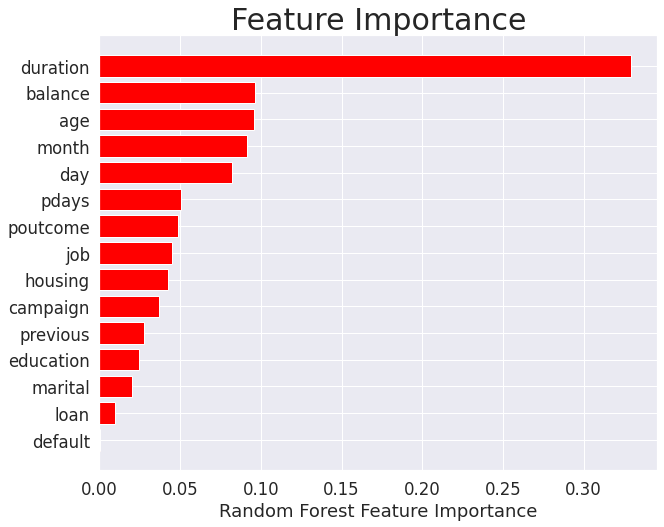

In [219]:
plt.figure(figsize=(10,8))
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rfc.feature_importances_[sorted_idx],color='red',align='center')
plt.xlabel("Random Forest Feature Importance")
plt.title('Feature Importance', fontsize=30);